In [1]:
import helper as h
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Y:\nick\fiber_photometry\fiber-photometry-code\helper.py:12: DeprecationWarning: Please use `curve_fit` from the `scipy.optimize` namespace, the `scipy.optimize.minpack` namespace is deprecated.
  from scipy.optimize.minpack import curve_fit


In [2]:
wd = r'Y:\nick\fiber_photometry\test'
behavior_raw = wd + os.path.sep + '20230407-CXR3-5.h264'
data_block = wd + os.path.sep + "test-230407-142629-CXR3-5"
video_name = behavior_raw.split("\\")[-1][:-5]
output_path = wd + os.path.sep + 'outputs'
h.set_path(output_path)

In [3]:
if not any(fname.endswith(video_name + '_trimmed.avi') for fname in os.listdir(output_path)):
    %matplotlib tk
    h.trim_video(behavior_raw, output_path)

%matplotlib inline

In [ ]:
if not any(fname.endswith(video_name + '_tracks.npy') for fname in os.listdir(output_path)):
    x_pos, y_pos, chamber_mask = get_tracks(threshold=28, ksize=5)
else:
    x_pos, y_pos = np.load(output_path + os.path.sep + video_name + '_tracks.npy')

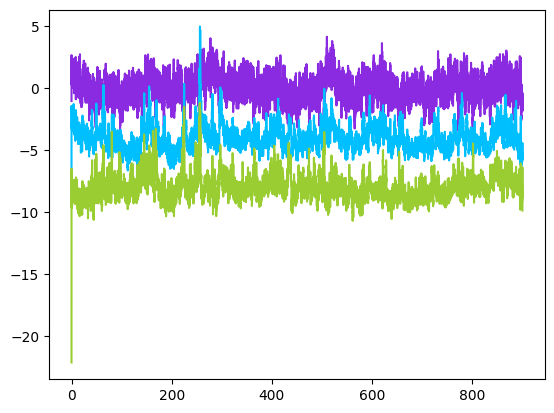

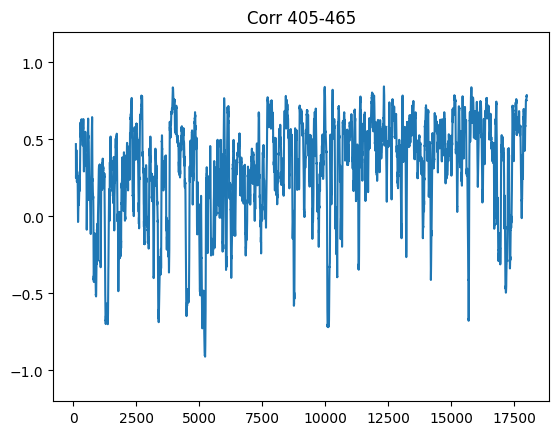

In [4]:
if not any(fname.endswith(video_name + '_fiber_data.npz') for fname in os.listdir(output_path)):
    dff465, t, dff560 = h.process_fiber_data(data_block, output_path, video_name)
else:
    fiber_data = np.load(output_path + os.path.sep + video_name + '_fiber_data.npz')
    dff405 = fiber_data['dff405']
    dff465 = fiber_data['dff465']
    dff560 = fiber_data['dff560']
    t = fiber_data['time']
    
    plt.figure(), plt.plot(t, dff405, color=[138/255, 43/255, 226/255]), 
    plt.plot(t, dff465-4, color=[0/255,191/255,255/255]), 
    plt.plot(t, dff560-8, color=[154/255,205/255,50/255])

    # compute rolling correlation between 465 and 405
    df = pd.DataFrame({'df405': dff405, 'df465': dff465})
    rolling_corr = df['df405'].rolling(100).corr(df['df465'])
    plt.figure(), plt.plot(rolling_corr), plt.ylim([-1.2, 1.2]), plt.title('Corr 405-465')

In [ ]:
make_annotated_plot(save_figs=True)

Making combined video
Use jRCaMP1b channel? y/[n]
Y:\nick\fiber_photometry\test\outputs\20230407-CXR3-5_combined_fiber_behavior.mp4


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Y:\\nick\\fiber_photometry\\test\\outputs'

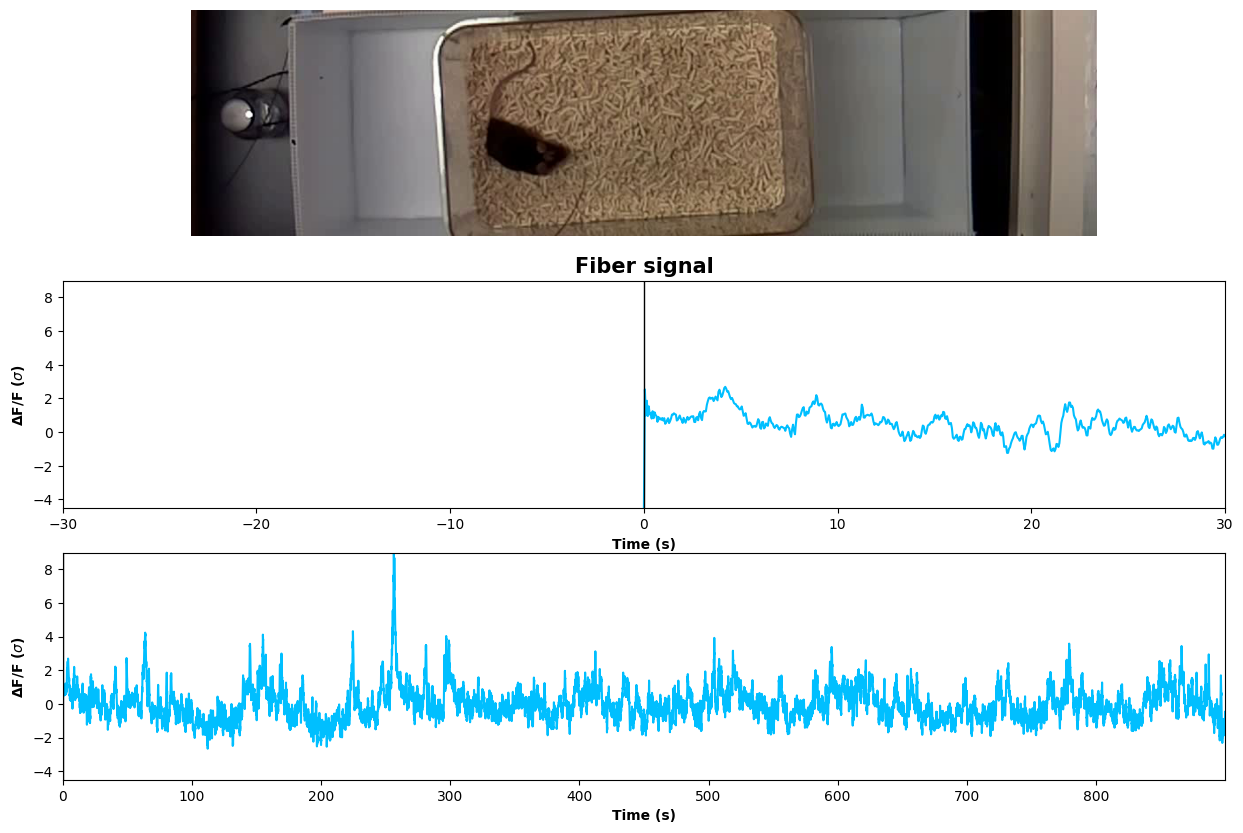

In [5]:
print("Making combined video")
h.make_combined_video(output_path, video_name, t, dff465, dff560)
print("Done")
